<a href="https://colab.research.google.com/github/tawadesharad/Global-Terrorism-Analysis-Capstone-Project/blob/main/Global_Terrorism_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

#Defination of Terrorism

To understand how the number of terrorist acts varies around the world and how it has changed over time. To do this, we need a clear and consistent definition of what terrorism is, and how it’s different from any other form of violence. This is not straightforward.



**"The threatened or actual use of illegal force and violence by a non-state actor to attain a political, economic, religious, or social goal through fear, coercion, or intimidation."**

The objective of this work is to analyze the region and country of a terrorist attack using exploratory data analysis, in order to acquire valuable information about the predicted attacks and attackers.

#**1. Importing relevant libraries**

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#**2. Data Cleaning**

In [80]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [81]:
df= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Capstone Project/Global Terrorism/Copy of Global Terrorism Data.csv',encoding='latin1')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [82]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [83]:
df.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

**As from above I have seen that there is lot of missing values in dataset and also there is more numbers of irrelevant columns. So, I choose only those columns which are useful and rename those in proper name. Removing rows with greater than 50% null values.**

In [84]:
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day', 'country_txt':'Country','provstate':'state',
                         'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                       'nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                       'weaptype1_txt':'Weapon_type','motive':'Motive'}, inplace=True)

In [85]:
df=df[['Year','Month','Day','Country','state','Region','city','latitude','longitude','AttackType','Target','Killed','Wounded','Summary','Group','Target_type','Weapon_type','Motive']]

In [86]:
df['casualties']= df['Killed']+df['Wounded']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [87]:
df.head()

,Year,Month,Day,Country,state,Region,city,latitude,longitude,AttackType,Target,Killed,Wounded,Summary,Group,Target_type,Weapon_type,Motive,casualties
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,Julio Guzman,1.0,0.0,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1.0
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),"Nadine Chaval, daughter",0.0,0.0,NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,0.0
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,Employee,1.0,0.0,NaN,Unknown,Journalists & Media,Unknown,NaN,1.0
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,U.S. Embassy,NaN,NaN,NaN,Unknown,Government (Diplomatic),Explosives,NaN,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,U.S. Consulate,NaN,NaN,NaN,Unknown,Government (Diplomatic),Incendiary,NaN,NaN


* Most of the column names of the dataset needed to be renamed for the purpose of easy to use and understand.
* A new column is created with the name "casualties" containing the sum of the values of total people killed and wounded.

In [89]:
df.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
state             421
Region              0
city              434
latitude         4556
longitude        4557
AttackType          0
Target            636
Killed          10313
Wounded         16311
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
casualties      16874
dtype: int64

In [90]:
thresh = len(df) * .5
df.dropna(thresh = thresh, axis = 1, inplace = True)

In [91]:
df.isnull().sum()

Year               0
Month              0
Day                0
Country            0
state            421
Region             0
city             434
latitude        4556
longitude       4557
AttackType         0
Target           636
Killed         10313
Wounded        16311
Summary        66129
Group              0
Target_type        0
Weapon_type        0
casualties     16874
dtype: int64

In [117]:
# Null Values with percentage
df.isnull().sum()/len(df) *100

Year            0.000000
Month           0.000000
Day             0.000000
Country         0.000000
state           0.231712
Region          0.000000
city            0.238867
latitude        2.507554
longitude       2.508104
AttackType      0.000000
Target          0.350045
Killed          5.676120
Wounded         8.977330
Summary        36.396409
Group           0.000000
Target_type     0.000000
Weapon_type     0.000000
casualties      9.287196
dtype: float64

In [93]:
df.shape

(181691, 18)

##Here find the most affected **Country**, **City**, **Region** and most **attacking** **terrorist** **group** and **type of attack**.

In [95]:
print('Country with most attacks :',df['Country'].value_counts().idxmax())
print('Maximum of',df['Killed'].max() ,'peoples killed in', df.loc[df['Killed'].idxmax()].Country)
print('City with most attacks:',df['city'].value_counts().index[1])
print('Region with most attack:',df['Region'].value_counts().idxmax())
print('Year with most attacks:',df['Year'].value_counts().idxmax())
print('Month with most attacks:',df['Month'].value_counts().idxmax())
print('Group which attacked most:',df['Group'].value_counts().index[1])
print('Attack mostly by :',df['AttackType'].value_counts().idxmax())

Country with most attacks : Iraq
Maximum of 1570.0 peoples killed in Iraq
City with most attacks: Baghdad
Region with most attack: Middle East & North Africa
Year with most attacks: 2014
Month with most attacks: 5
Group which attacked most: Taliban
Attack mostly by : Bombing/Explosion


#**Data** **Visualization**

##Correlation Matrix

In [96]:
df_copy = df.copy()

In [97]:
from sklearn.preprocessing import LabelEncoder

**Label Encoding refers to converting the labels into a numeric form so as to convert them into the machine-readable form.**

In [98]:
labelencoder=LabelEncoder()
for column in df.columns:
    df_copy[column] = labelencoder.fit_transform(df_copy[column])

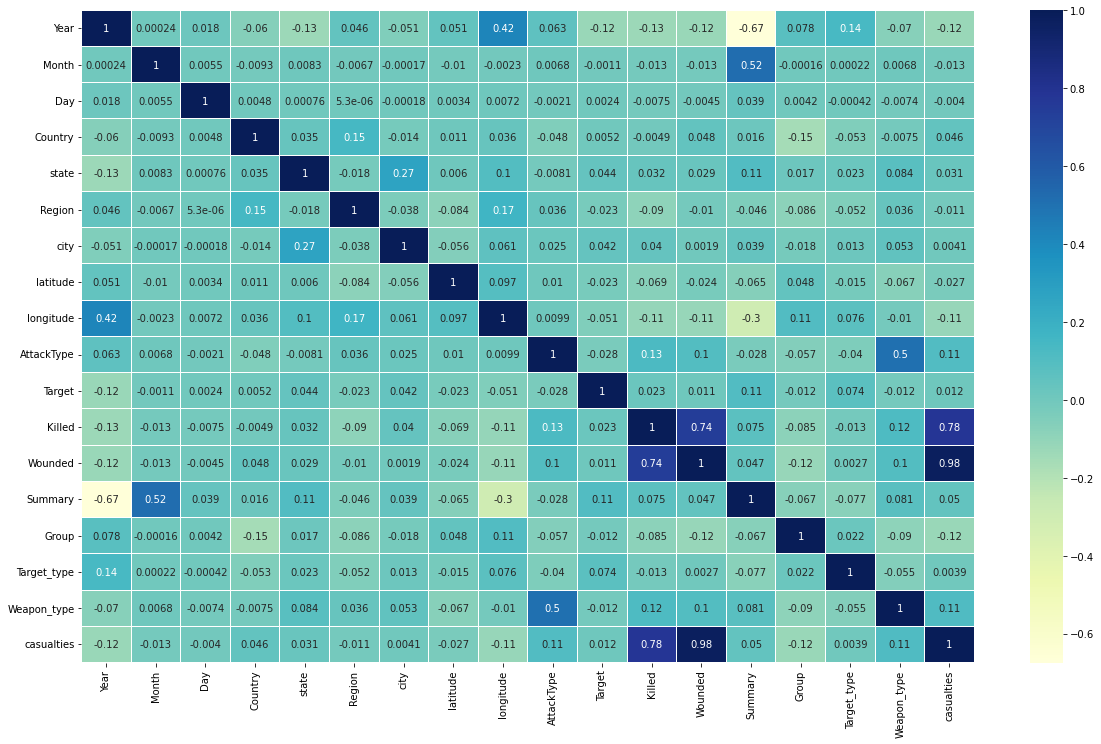

In [99]:
# Heatmap of Correlation matrix for visual understanding
plt.figure(figsize=(20,12))
sns.heatmap(df_copy.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);

* Here seen that country and latitude are correlated which is expected.
* Attack type and weapon used in the attack also hold close ties with each other as attack type is defined based on the weapons used in that incident.

##Terrorist Activities in Each Year

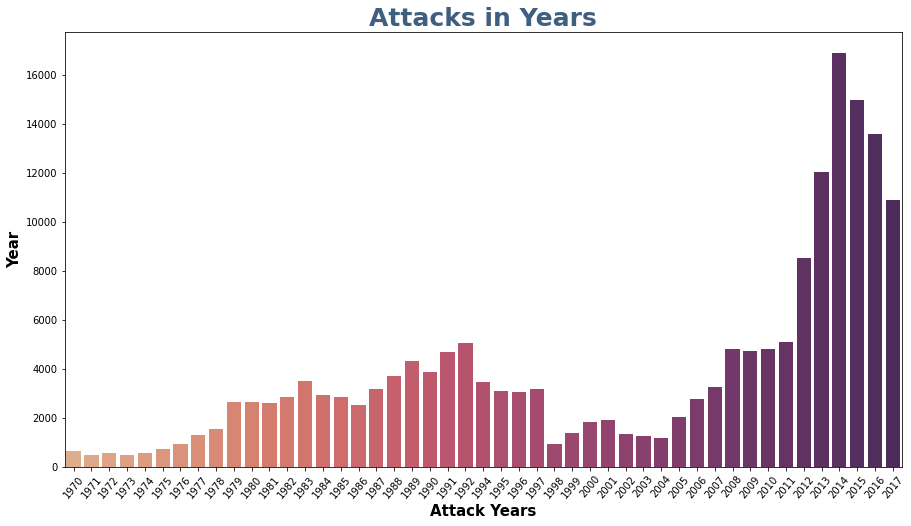

In [100]:
#attack VS Years
x_axis=df['Year'].unique()
y_axis=df['Year'].value_counts().sort_index()
plt.figure(figsize=(15,8))
plt.title("Attacks in Years",weight='bold',fontsize=25,color=sns.cubehelix_palette(8, start=.5, rot=-.75)[-3])
plt.xlabel("Attack Years",weight='bold',fontsize=15)
plt.ylabel("Number of attacks each year",weight='bold',fontsize=15)
plt.xticks(rotation=50)
sns.barplot(x=x_axis, y=y_axis, palette= 'flare',label='x')
plt.show()



* Summarizing all the terrorist attacks over the years can provide us an idea about how terrorism has evolved and what rate has it impacted the world each year
*  Look at the increase in cases of attack year after year 2002-2004.
*  Most of the attacks were done on year 2014.







## **Highest numbers of killed people in top 10 countries.**

In [101]:
most_killed=df[['Country','Killed']].groupby('Country',as_index=False).sum().sort_values(by='Killed',ascending=False).head(10)

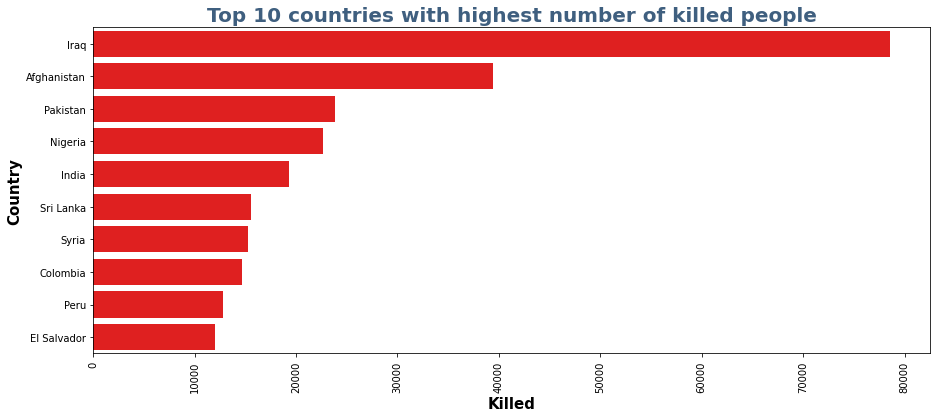

In [102]:
y_axis=most_killed['Country']
x_axis=most_killed['Killed']
plt.figure(figsize=(15,6))
plt.title("Top 10 countries with highest number of killed people",fontsize=20, weight='bold',color=sns.cubehelix_palette(8, start=.5, rot=-.75)[-3])
plt.ylabel("Country",weight='bold',fontsize=15)
plt.xlabel("Killed",weight='bold',fontsize=15)
plt.xticks(rotation=90)
sns.barplot(x=x_axis, y=y_axis,color='red')
plt.show()

* Iraq is the most affected country from terrorism because most of the peoples killed in iraq.

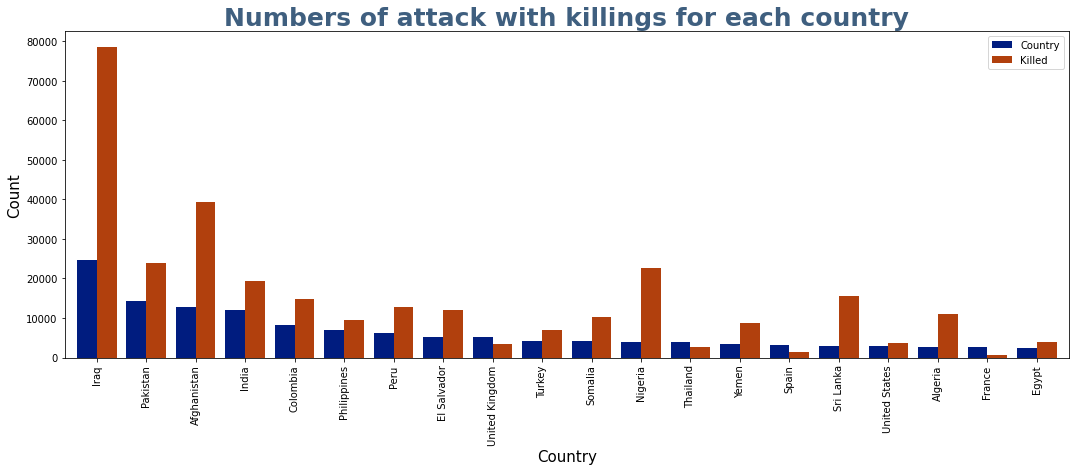

In [103]:
country_attacks=df['Country'].value_counts()[:20].to_frame()
country_killed=df.groupby(['Country'])['Killed'].sum().sort_values(ascending=False).to_frame()
country_attacks.merge(country_killed, how = 'left' , left_index = True, right_index = True ).plot.bar(width = 0.8 , color = sns.color_palette('dark',2))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.title("Numbers of attack with killings for each country",color=sns.cubehelix_palette(8, start=.5, rot=-.75)[-3],weight='bold',fontsize=25)
plt.ylabel("Count" ,fontsize = 15)
plt.xlabel("Country",fontsize = 15)
plt.show()


1. lists the most countries affected by terrorism based on the total number of attacks. Another bar along with each countries’ attack count is the number of total victims killed in those attacks combined for that country.
1.   Look at the bar of **Iraq**, it shows terrorist are very effective in getting what they wish for i.e destruction in terms of lives and same can be said for top 5 countries.
2. There are countries like **Philippines**, **Peru** and **the United Kingdom** which has faced an almost similar number of attacks but have a different number of kills. The United Kingdom has suffered significantly fewer casualties compared to the other 2 countries.
2.  It also shows how Intelligence and Security agencies are not as efficient and vigilant w.r.t internal security of their countries.
3. This also proves the above assumption that attacks generally happens in densely populated areas thus it will eventually claim many lives.
4. The most safe country w.r.t this chart is **France** as the "attacks > kills".



##Terrorist Activities In Each Region

[]

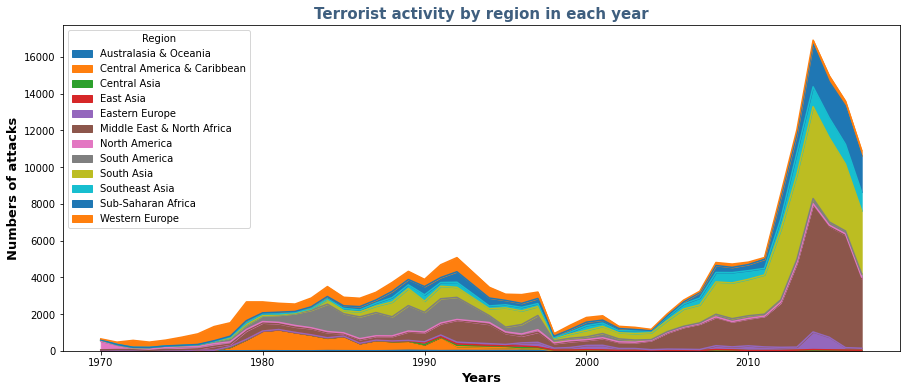

In [104]:
pd.crosstab(df.Year,df.Region).plot(kind='area',figsize=(15,6))
plt.title('Terrorist activity by region in each year',fontsize=15,weight='bold',color=sns.cubehelix_palette(8, start=.5, rot=-.75)[-3])
plt.xlabel('Years',Weight='bold',fontsize=13)
plt.ylabel('Numbers of attacks',Weight='bold',fontsize=13)
plt.plot()

* Based on the geographic location of countries, they have been subcategorized into twelve regions to compare the rate of terrorism in each one of them as shown. **Middle east and north Africa** have the highest number of attacks followed by **South Asia and South America**. Terrorism here does not show an equal distribution among all regions. As a result, based on the number of attacks, different level of attention is required for each individual region.

* The **South America** has been the third-highest affected region in the world after North Africa & the Middle East and South Asia. But from graph, see South America has no significant contribution to the current trending terrorism. South America was impacted by terrorism during the early 1980s to mid-1990s. Since then, terrorism has been relatively low. So even though South America region shows an overall high rate of total attacks compared to other regions overall, this region does not add much to the current global terrorism situation. 
* Opposite of this is true for the **Middle East and North Africa region**. Middle East and North Africa has shown no noticeable rise in terrorism other than the early 2000s. This change in terrorism has been sudden and steep. But otherwise, there is no previous history of such high terrorist activities in the past.



##Safest countries from terrorist attack i.e. 0 Killed people.

In [105]:
zero_killed_country=df[['Country','Killed']].groupby('Country',as_index=False).sum().sort_values(by='Killed',ascending=True).head(17)
list(zero_killed_country['Country'])

['French Polynesia',
 'Benin',
 'Seychelles',
 'New Hebrides',
 'South Yemen',
 'Vatican City',
 'Vanuatu',
 'Iceland',
 'Luxembourg',
 'Martinique',
 'Mauritius',
 'Antigua and Barbuda',
 'St. Kitts and Nevis',
 'Andorra',
 'Falkland Islands',
 'Wallis and Futuna',
 'Brunei']

#Active Terrorist Groups

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


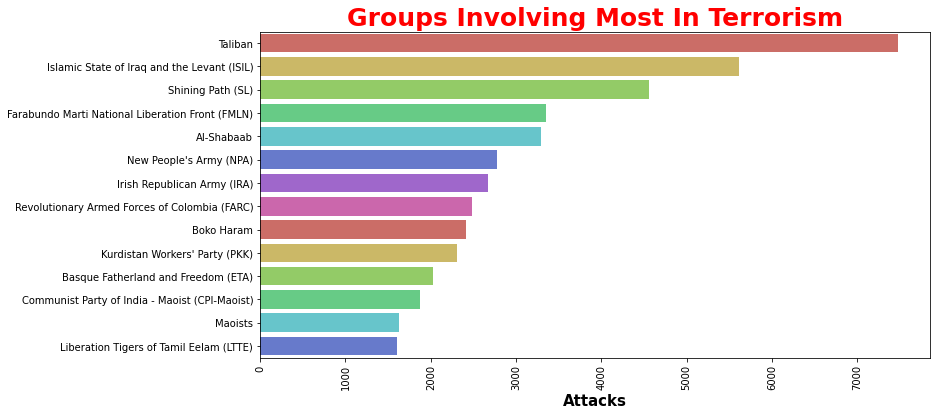

In [106]:
# groups involve in terrorism with 
group_x= df['Group'].value_counts().head(15)
group_x=group_x.drop('Unknown',axis=0)

plt.subplots(figsize=(12,6))
sns.barplot(group_x.values,group_x.index,palette=sns.color_palette("hls", 8))
plt.title('Groups Involving Most In Terrorism',weight='bold',fontsize=25,color='red')
plt.xlabel('Attacks',weight='bold',fontsize=15)
plt.xticks(rotation= 90)
plt.show()

* Graph describes some of the most notorious terrorist groups and their activity.
* **Taliban** is the most active terrorist group in the world.

**Top 15 terrorist groups which killed most people**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Killed People')

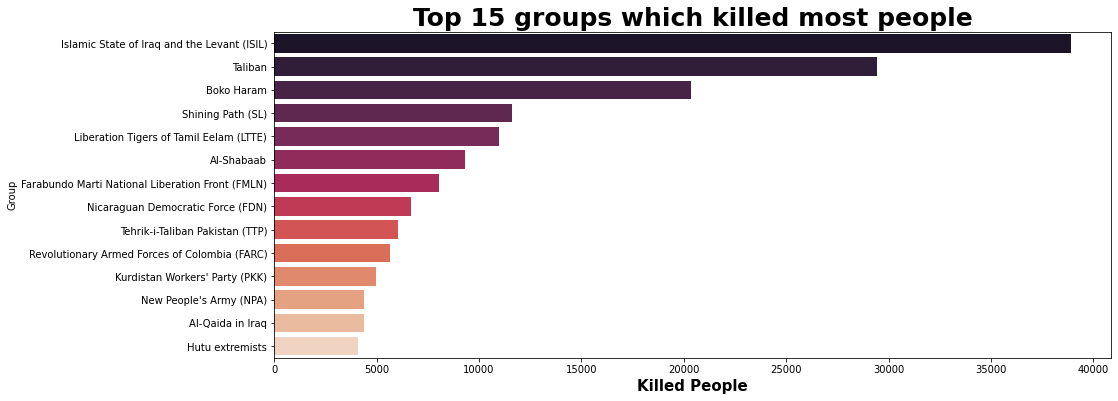

In [107]:
# groups with killed numbers of people
group_with_killed=df[['Group','Killed']].groupby('Group').sum().sort_values(by='Killed',ascending=False).head(15)
plt.subplots(figsize=(15,6))
sns.barplot(group_with_killed.Killed.values[1:],group_with_killed.index[1:],palette='rocket')
plt.title('Top 15 groups which killed most people',fontsize=25,weight='bold')
plt.xlabel('Killed People',fontsize=15,weight='bold')

* Islamic State of Iraq and the Levant (ISIL) killed most people. and Taliban also killed most people after ISIL.

##Analysis of Weapons Used

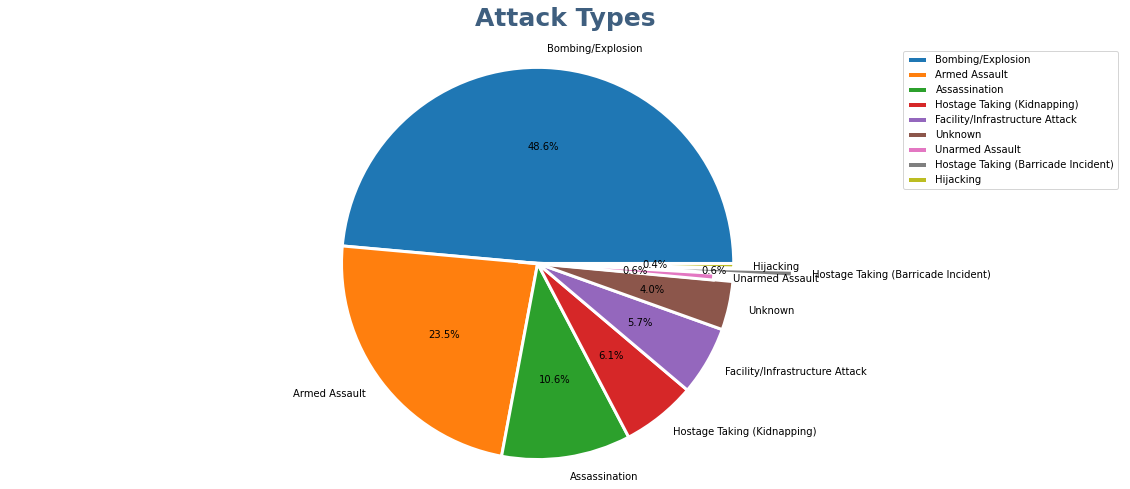

In [108]:
attacktype_x=df['AttackType'].unique()
attacktype=df['AttackType'].value_counts()
# data=list(attacktype_y)
lable=['Bombing/Explosion', 'Armed Assault', 'Assassination', 'Hostage Taking (Kidnapping)', 'Facility/Infrastructure Attack', 'Unknown', 'Unarmed Assault', 'Hostage Taking (Barricade Incident)', 'Hijacking']
# convert into %
attack_percent = []

for j in attacktype:
    percent = round(j*100/sum(attacktype),2)
    attack_percent.append(percent)
attack_percent
y=np.array(attack_percent)
explod=[0,0,0,0,0,0,-0.1,0.3,0]

fig1, x1=plt.subplots(figsize=(20,8))
x1.pie(y, labels=lable,explode=explod,autopct='%1.1f%%',wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'})
x1.axis('equal')
plt.legend(loc='upper right')
plt.title('Attack Types',fontsize=25,weight='bold',pad=20,color=sns.cubehelix_palette(8, start=.5, rot=-.75)[-3])
plt.show()


*  The weapons were segregated between 9 categories.
* It seen that explosives were used in around 48.6% of the attacks, followed by Armed Assault accounted for 23.5% of the attacks. 
* It can clearly seen that Explosives is the most common weapon type. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


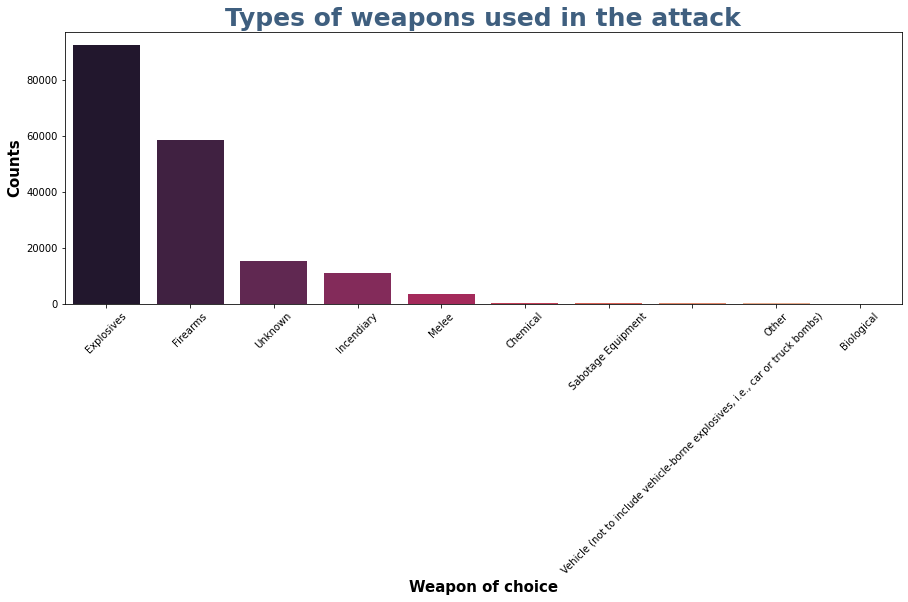

In [109]:
# Types of weapon used
plt.figure(figsize=(15, 5))
sns.barplot(
    df["Weapon_type"].value_counts()[:10].index,
    df["Weapon_type"].value_counts()[:10].values,
    palette=("rocket"),
)
plt.title("Types of weapons used in the attack",color=sns.cubehelix_palette(8, start=.5, rot=-.75)[-3],weight='bold',fontsize=25)
plt.xlabel("Weapon of choice",weight='bold',fontsize=15)
plt.ylabel("Counts",weight='bold',fontsize=15)
plt.xticks(rotation=45)
plt.show()



*   Bombs/Explosives are most used weapon along with Guns (might be AK-47 or their variant as seen often in videos).

*   We can take deep breath as these notorious groups still didn't possess weapons of mass destruction like Biological/Radiological as seen by data till now.




##Target Type

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[]

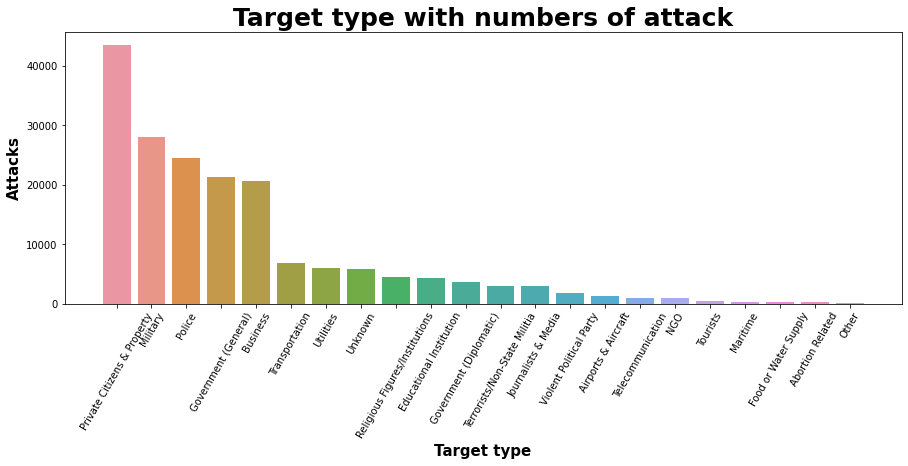

In [110]:
target_attacks=df['Target_type'].value_counts()

plt.figure(figsize=(15, 5))
sns.barplot(target_attacks.index,target_attacks.values)
plt.title('Target type with numbers of attack',fontsize=25,weight='bold')
plt.xlabel('Target type',fontsize=15,weight='bold')
plt.ylabel('Attacks',fontsize=15,weight='bold')
plt.xticks(rotation=60)
plt.plot()

* From graph above **Private Citizens and property military** is the most target type as per the dataset.

#Most attacked Top 10 cities in the world

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


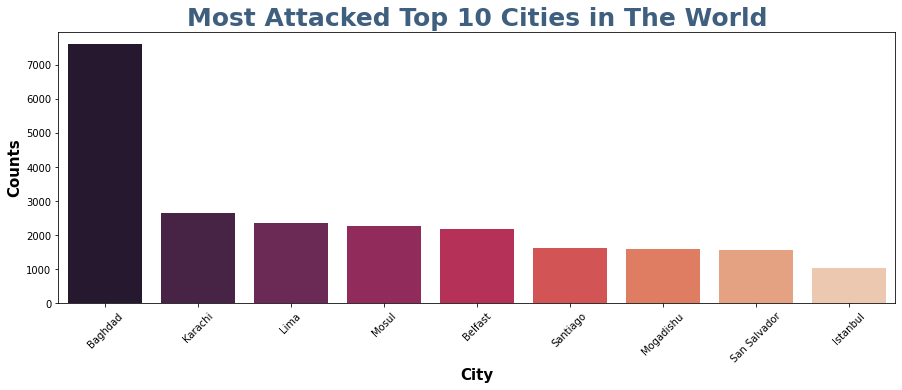

In [111]:
plt.figure(figsize=(15, 5))
sns.barplot(
    df["city"].value_counts()[1:10].index,
    df["city"].value_counts()[1:10].values,
    palette=("rocket"),
)
plt.title("Most Attacked Top 10 Cities in The World",color=sns.cubehelix_palette(8, start=.5, rot=-.75)[-3],weight='bold',fontsize=25)
plt.xlabel("City",weight='bold',fontsize=15)
plt.ylabel("Counts",weight='bold',fontsize=15)
plt.xticks(rotation=45)
plt.show()

* As expected Baghdad is most affected city(and yes this is also called province).
* However the cities included here affected because either they are capital of state or densely populated areas in the respective countries i.e easy target for terrorists.

##Countrywise analysis

* A function on each countrywise analysis, In that **Terror attacks on top 10 cities of country**,**Active terrorist groups in respective country** and **Total casualities from 1970 to 2017**.

In [112]:
def country_analysis(data , country=None, line_color=None , palette=None , title =None):
    plt.figure(figsize = (17,10))
    #Plot 1
    plt.subplot(2,2,1)
    sns.countplot(y = data.loc[data['Country'] == country]['city'] ,\
                  order = data.loc[data.Country == country].city.value_counts()[:10].index,\
                  data = data ,\
                  palette = sns.color_palette(palette,10),\
                  edgecolor = sns.color_palette('dark',5))
    plt.xticks(rotation = 90)
    plt.title(f"Terror attacks on Top 10 cities of {country}",weight = 'bold' ,fontsize = 18 ,loc = 'left')
    plt.xlabel('Count',fontsize = 20)
    plt.ylabel('City',fontsize = 20)
    #Plot 2
    plt.subplot(2,2,3)
    sns.countplot(x = data.query('Country == @country').Group ,\
                  data = data ,\
                  order = data.query('Country == @country').Group.value_counts()[:10].index[1:],\
                  palette = sns.color_palette(palette,7),\
                  edgecolor = sns.color_palette('dark',5))
    plt.title(f"Terrorist Groups active/were active in {country}",weight = 'bold' ,fontsize = 18 , loc = 'right')
    plt.xticks(rotation =80)
    plt.xlabel('Group',fontsize = 20)
    plt.ylabel('Attack Count',fontsize = 20)
    

    # Plot 3
    plt.subplot(2,2,2)
    data.query('Country == @country').groupby(['Year'])['casualties'].sum().plot(xticks = data.loc[data.Country == country].groupby(['Year'])['casualties'].sum().index, rot=90 , color = line_color)
    plt.title(f"Total casualities from (1970 - 2017) in {country}", fontdict = {'fontsize' : 18 , 'weight': 'bold' } , loc = 'left')
    plt.ylabel("Casualities" ,fontsize = 20)
    plt.xlabel('Year',fontsize = 20)

    plt.subplots_adjust(wspace = 1 ,hspace =0.5 ,top = 0.5 , bottom = 0.1) 
    plt.tight_layout()  
    plt.show()

## Country - Iraq

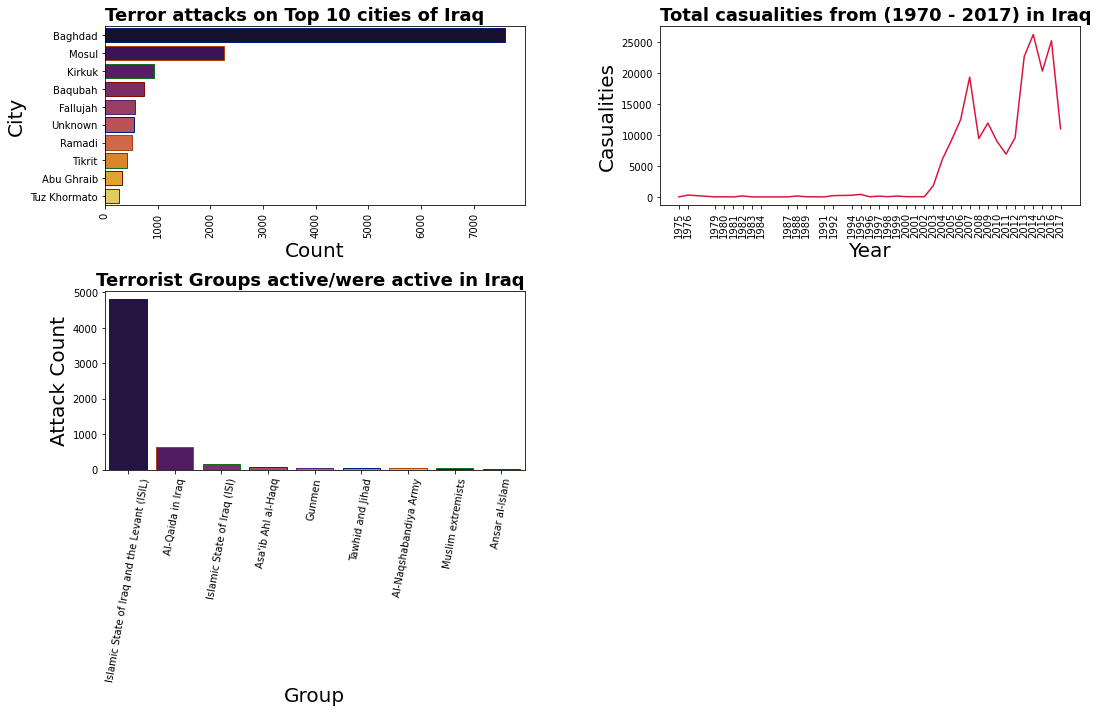

In [113]:
country_analysis(df, country ='Iraq', palette = 'inferno', line_color = 'crimson')

* Most of the attacks are on near Capital of Iraq. This tells us how much these groups hate Government Organizations.
* It seems like terror Attacks have been increased since 2002 and the main group responsible for these is ISIL (Islamic State and it's groups local to region).




## Country - India

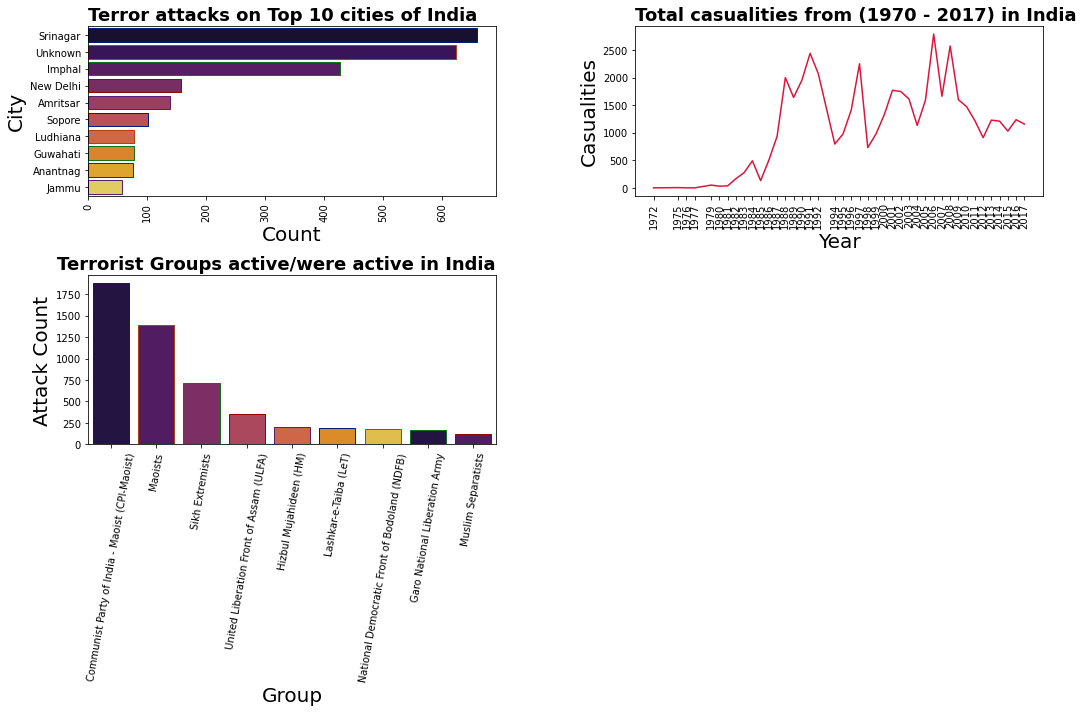

In [114]:
country_analysis(df, country ='India', palette = 'inferno', line_color = 'crimson')

* The main group for terror attacks in India is **Communist Party of Indai- Maoist**.
* Most attacked city in India is Srinagar which is the border of India and this is in Kashmir.
* It seems like terror Attacks have been increased in India since 1985 and the main group responsible for these is **Communist Party of Indai- Maoist**.

# Country - Pakistan

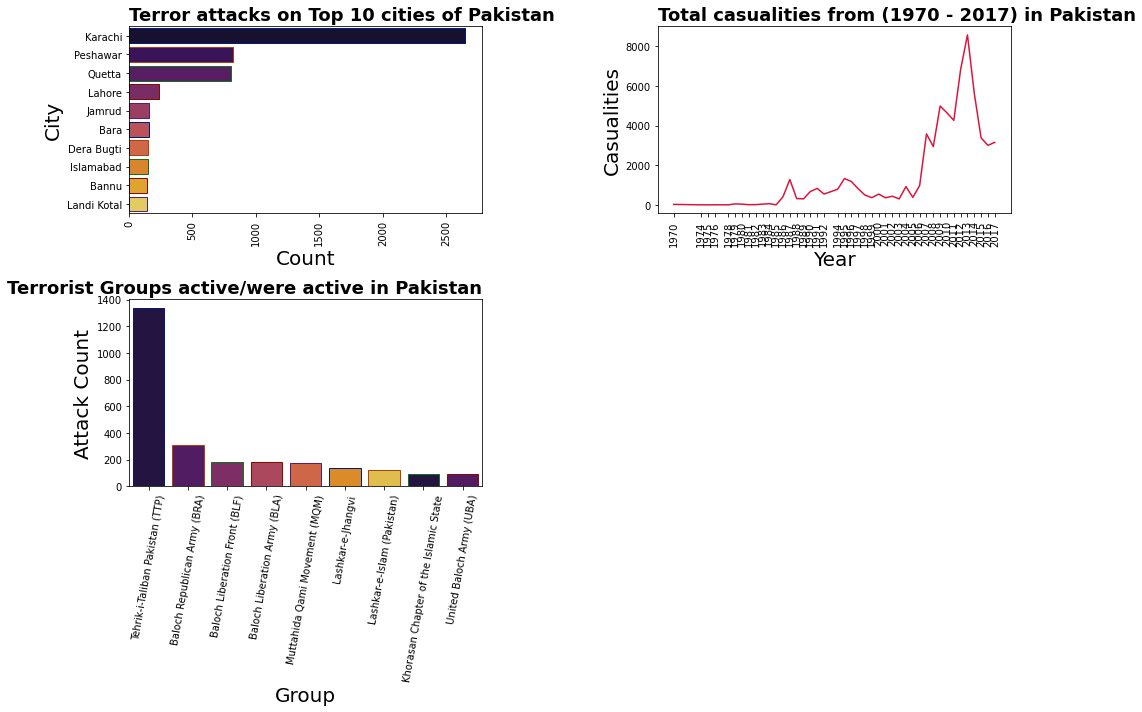

In [115]:
country_analysis(df, country ='Pakistan', palette = 'inferno', line_color = 'crimson')

* The main group responsible for attacks in Pakistan is "Tehrik-i-Taliban Pakistan" (Taliban group for this region).
* Most of the attacks are in Pakistan in **Karachi** city.
* It seems like terror Attacks have been increased in Pakistan since 1985 and the main group responsible for these is **Tehrik-i-Taliban Pakistan**.

#Country - Syria

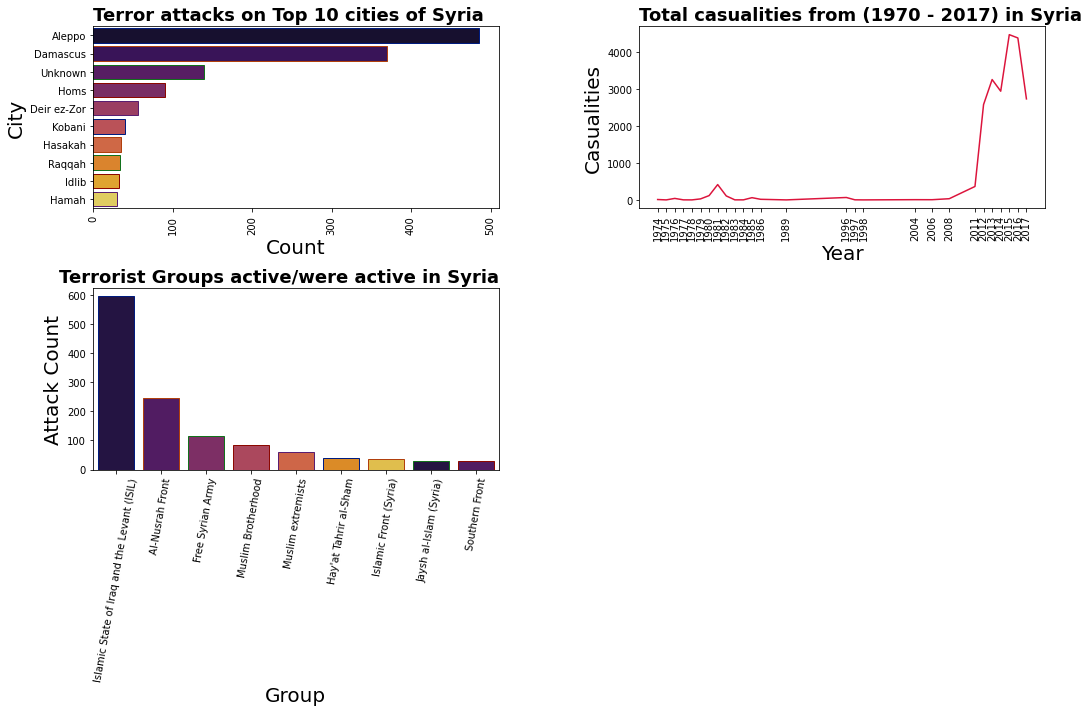

In [116]:
country_analysis(df, country ='Syria', palette = 'inferno', line_color = 'crimson')

* The main group respomsible for the attacks in Syria is **Islamic state of Iraq and the levant(ISIL)**.
* Most attacks in Syria is in **Aleppo**.
* Terrorist attacks have been increased in Syria since 2011.

# Conclusion

* It was clear that numbers of terrorist attacks were increases from 2002-2004.
* Most of the attacks were done on year 2014.
* Iraq is the most affected country from terrorism because most of the peoples killed in iraq. In Iraq maximum of 1570 peoples killed in single attack.
* As expected Baghdad is most affected city(and yes this is also called province).
* There are countries like Philippines, Peru and the United Kingdom which has faced an almost similar number of attacks but have a different number of kills. The United Kingdom has suffered significantly fewer casualties compared to the other 2 countries.
* It also shows how Intelligence and Security agencies are not as efficient and vigilant w.r.t internal security of their countries.
* Middle east and north Africa have the highest number of attacks followed by South Asia and South America. Terrorism here does not show an equal distribution among all regions.
* Taliban is the most active terrorist group in the world.
* Islamic State of Iraq and the Levant (ISIL) killed most people. and Taliban also killed most people after ISIL.
* It seen that explosives were used in around 48.6% of the attacks, followed by Armed Assault accounted for 23.5% of the attacks.
* Private Citizens and property military is the most target type as per the dataset.

